In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
A = [71, 75, 65, 69]
B = [90, 80, 86, 84]
C = [72, 77, 76, 79]

In [3]:
data = A + B + C
school_names = (['School_A'] * len(A)) +  (['School_B'] * len(B)) +  (['School_C'] * len(C))
data = pd.DataFrame({'School': school_names, 'score': data})

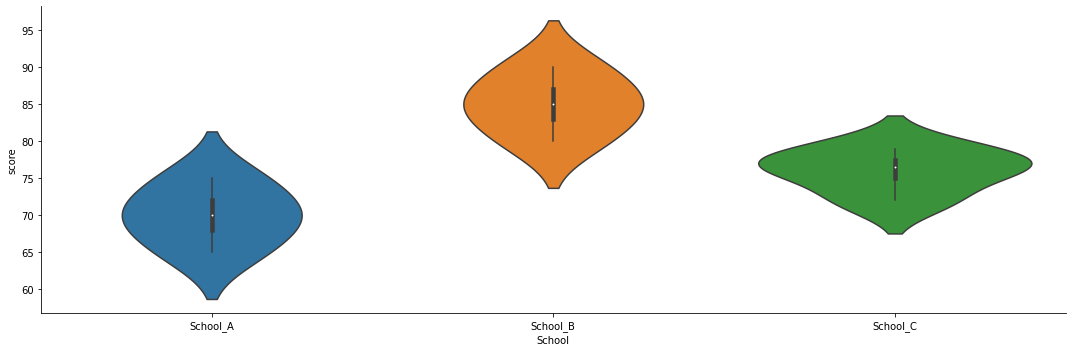

In [4]:
sns.catplot( data=data , x='School', y='score', dodge=True, kind='violin', aspect=3)
plt.show()

In [5]:
data

,School,score
0,School_A,71
1,School_A,75
2,School_A,65
3,School_A,69
4,School_B,90
5,School_B,80
6,School_B,86
7,School_B,84
8,School_C,72
9,School_C,77



   School A    	School B	School C
1	 71           90        72
2	 75           80        77
3	 65           86        76
4	 69	          84        79


In [6]:
data.groupby('School').mean()

,score
School,
School_A,70
School_B,85
School_C,76


# Hypothesis
null hypothesis      (H0): u1 = u2 = u3 ...u1 is mean for school A, u2-> mean of school B, u3->mean of school C
alternate hypothesis (H1): u1 != u2 != u3

In [7]:
# compute overall mean
overall_mean = data['score'].mean()
overall_mean

77.0

In [8]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['score'] - data['overall_mean'])**2)
ss_total, data

(586.0,
       School  score  overall_mean
 0   School_A     71          77.0
 1   School_A     75          77.0
 2   School_A     65          77.0
 3   School_A     69          77.0
 4   School_B     90          77.0
 5   School_B     80          77.0
 6   School_B     86          77.0
 7   School_B     84          77.0
 8   School_C     72          77.0
 9   School_C     77          77.0
 10  School_C     76          77.0
 11  School_C     79          77.0)

In [9]:
# compute group means
group_means = data.groupby('School').mean()
print(group_means)
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means

          score  overall_mean
School                       
School_A     70          77.0
School_B     85          77.0
School_C     76          77.0


,group_mean,overall_mean
School,,
School_A,70,77.0
School_B,85,77.0
School_C,76,77.0


In [10]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'School', right_index = True)

In [11]:
data

,School,score,overall_mean_x,group_mean,overall_mean_y
0,School_A,71,77.0,70,77.0
1,School_A,75,77.0,70,77.0
2,School_A,65,77.0,70,77.0
3,School_A,69,77.0,70,77.0
4,School_B,90,77.0,85,77.0
5,School_B,80,77.0,85,77.0
6,School_B,86,77.0,85,77.0
7,School_B,84,77.0,85,77.0
8,School_C,72,77.0,76,77.0
9,School_C,77,77.0,76,77.0


In [12]:
# compute Sum of Squares Residual, deviation from group mean ssb
ssb = sum((data['score'] - data['group_mean'])**2)
ssb

130

In [13]:
# compute Sum of Squares within
ssw = sum((data['overall_mean_x'] - data['group_mean'])**2)
ssw

456.0

In [14]:
# compute Mean Square Residual
n_groups = len(set(data['School']))
n_obs = data.shape[0]     # no of observation(inputs)
df= n_obs - n_groups      # degree of freedom by group 
# for m*n matrix df = (m-1) * n , for (4 * 3) matrix df = (4-1) * 3 = 9
print("degree of f -->",df)
ms_residual = ssb / df     
ms_residual,n_obs,n_groups


degree of f --> 9


(14.444444444444445, 12, 3)

In [15]:
# compute Mean Square Explained
df_by_group = n_groups - 1        # for 3 groups(A,B,C) df = len of unique(groups) - 1 i.e 3 - 1 = 2
ms_explained = ssw / df_by_group
ms_explained, df_by_group

(228.0, 2)

In [16]:
# compute F-Value
f = ms_explained / ms_residual
f

15.784615384615384

Threshold 
p value = 1%
i.e             0.01% in standardized form

In [18]:
# compute p-value
import scipy.stats
p_value = scipy.stats.f.cdf(0.01, df, df_by_group)
p_value

7.135641209883598e-07

here f > p_palue : null hypothesis is rejected that means u1 != u2 != u3